# Data Analysis and Visualization: Amazon Prime Data Set

I used the dataset available on [Kaggle](https://www.kaggle.com/padhmam/amazon-prime-movies). It contains 8127 movies scraped from Amazon Prime Video website.

#### Let's have an overview of the dataset:

Movie Name: Name of the Movie

Language: Audio language of the Movie (some movies are dubbed in multiple languages)

IMDb Rating: The rating a movie received in the IMDb Platform

Running Time: Total running time of the movie in hours and minutes

Year of Release: The year in which a movie was released in the theatres or on Amazon Prime for Amazon Prime Originals Movies

Maturing Rating: Specifies the target audience.
- All: Appropriate for Kids
- 7+: Appropriate for Older Kids
- 13+: Appropriate for teens
- 16+: Appropriate for Young Adults
- 18+: Appropriate for Adults
- NR: Unrated

Plot: This column contains a short summary of the movie's plot.

## Import Necessary Libraries and read in the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


amz_prime = pd.read_csv('amazon prime movies.csv')
amz_prime.head()

,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Plot
0,John Rambo,Tamil,7,1 h 26 min,2008,18+,"In Thailand, John Rambo joins a group of merce..."
1,American Pie,English,7,1 h 35 min,1999,18+,You'll never look at warm apple pie the same w...
2,Bombshell,English,6.8,1 h 48 min,2019,18+,"The provocative real story of three smart, amb..."
3,Love Birds,Tamil,5.1,2 h 40 min,1996,All,"After accidentally meeting, Mridula (Nagma) an..."
4,Hippi,Telugu,5,2 h 20 min,2019,18+,Hippi is about the live-in relationship betwee...


In [2]:
amz_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie Name       8127 non-null   object
 1   Language         8127 non-null   object
 2   IMDb Rating      8127 non-null   object
 3   Running Time     8127 non-null   object
 4   Year of Release  8127 non-null   object
 5   Maturity Rating  8127 non-null   object
 6   Plot             8122 non-null   object
dtypes: object(7)
memory usage: 444.6+ KB


## 1. Data Cleaning

The dataset contains 7 columns, most of which are strings. The column names use spaces instead of Python's preferred snakecase.
So let's begin with converting the column names to snakecase.

In [3]:
amz_prime.columns

Index(['Movie Name', 'Language', 'IMDb Rating', 'Running Time',
       'Year of Release', 'Maturity Rating', 'Plot'],
      dtype='object')

In [4]:
corrected_list = ['movie_name', 'language', 'imdb_rating', 'running_time','year_of_release', 'maturity_rating', 'plot']

In [5]:
amz_prime.columns = corrected_list
amz_prime.head()

,movie_name,language,imdb_rating,running_time,year_of_release,maturity_rating,plot
0,John Rambo,Tamil,7,1 h 26 min,2008,18+,"In Thailand, John Rambo joins a group of merce..."
1,American Pie,English,7,1 h 35 min,1999,18+,You'll never look at warm apple pie the same w...
2,Bombshell,English,6.8,1 h 48 min,2019,18+,"The provocative real story of three smart, amb..."
3,Love Birds,Tamil,5.1,2 h 40 min,1996,All,"After accidentally meeting, Mridula (Nagma) an..."
4,Hippi,Telugu,5,2 h 20 min,2019,18+,Hippi is about the live-in relationship betwee...


From the dataset information above, I find that the 'imdb_rating' and 'year_of_release' columns are numeric values stored as text. To change this I'll first remove the non-numeric characters and convert these columns to numeric dtype.

In [6]:
amz_prime['imdb_rating'].value_counts().sort_index()

         None       1
 2.9                1
 3.2                1
 3.3                1
 3.5                1
                 ... 
9.2                 3
9.3                 1
9.4                 3
9.5                 1
None             2007
Name: imdb_rating, Length: 137, dtype: int64

In [7]:
amz_prime['imdb_rating'] = amz_prime['imdb_rating'].str.replace('None', '0')
amz_prime['year_of_release'] = amz_prime['year_of_release'].str.replace('None', '0')

In [8]:
amz_prime['imdb_rating'] = amz_prime['imdb_rating'].astype(float)
amz_prime['year_of_release'] = amz_prime['year_of_release'].astype(int)

## 2. Exploring the dataset

In [9]:
amz_prime['language'].value_counts()

Hindi        1982
English      1699
Bengali      1201
Telugu        987
Tamil         721
Malayalam     518
Kannada       419
Marathi       353
Punjabi       133
Gujarati      114
Name: language, dtype: int64

In [10]:
amz_prime['year_of_release'].value_counts()

2017    762
2019    730
2018    579
2020    558
0       397
       ... 
1959      1
1954      1
1952      1
1961      1
1956      1
Name: year_of_release, Length: 69, dtype: int64

In [11]:
amz_prime['maturity_rating'].value_counts()

13+    2606
NR     2054
All    1762
18+    1138
16+     382
7+      185
Name: maturity_rating, dtype: int64

## 3. Languages with the most content

In [12]:
col = "language"
grouped = amz_prime[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col:"count", "index":col})
grouped

,language,count
0,Hindi,1982
1,English,1699
2,Bengali,1201
3,Telugu,987
4,Tamil,721
5,Malayalam,518
6,Kannada,419
7,Marathi,353
8,Punjabi,133
9,Gujarati,114


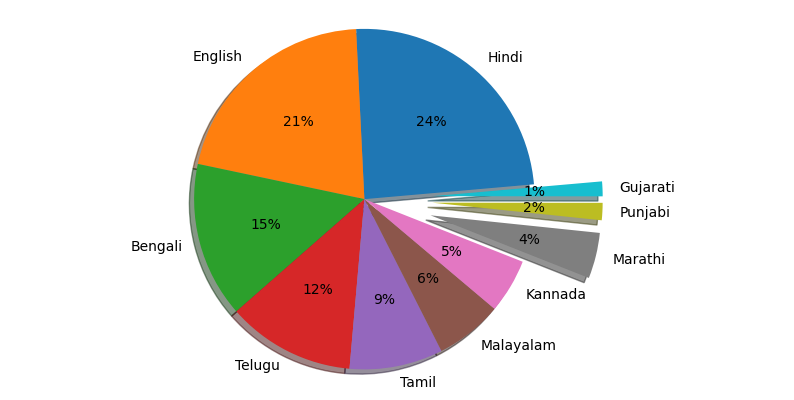

In [13]:

explode = (0,0,0,0,0,0,0,0.4,0.4,0.4) 
fig1, ax1 = plt.subplots(figsize=(10,5), dpi=100)
ax1.pie(grouped['count'],explode=explode,labels=grouped['language'], autopct='%1.0f%%', shadow=True, startangle=5)

ax1.axis('equal')
plt.show()

- Around half of the content on Amazon Prime comprises of Hindi and English Language movies.
- The remaining half conisits of Bengali and south indian language movies along with the least amount of movies of Punjabi and Gujarati.


## 4. Popular Movies

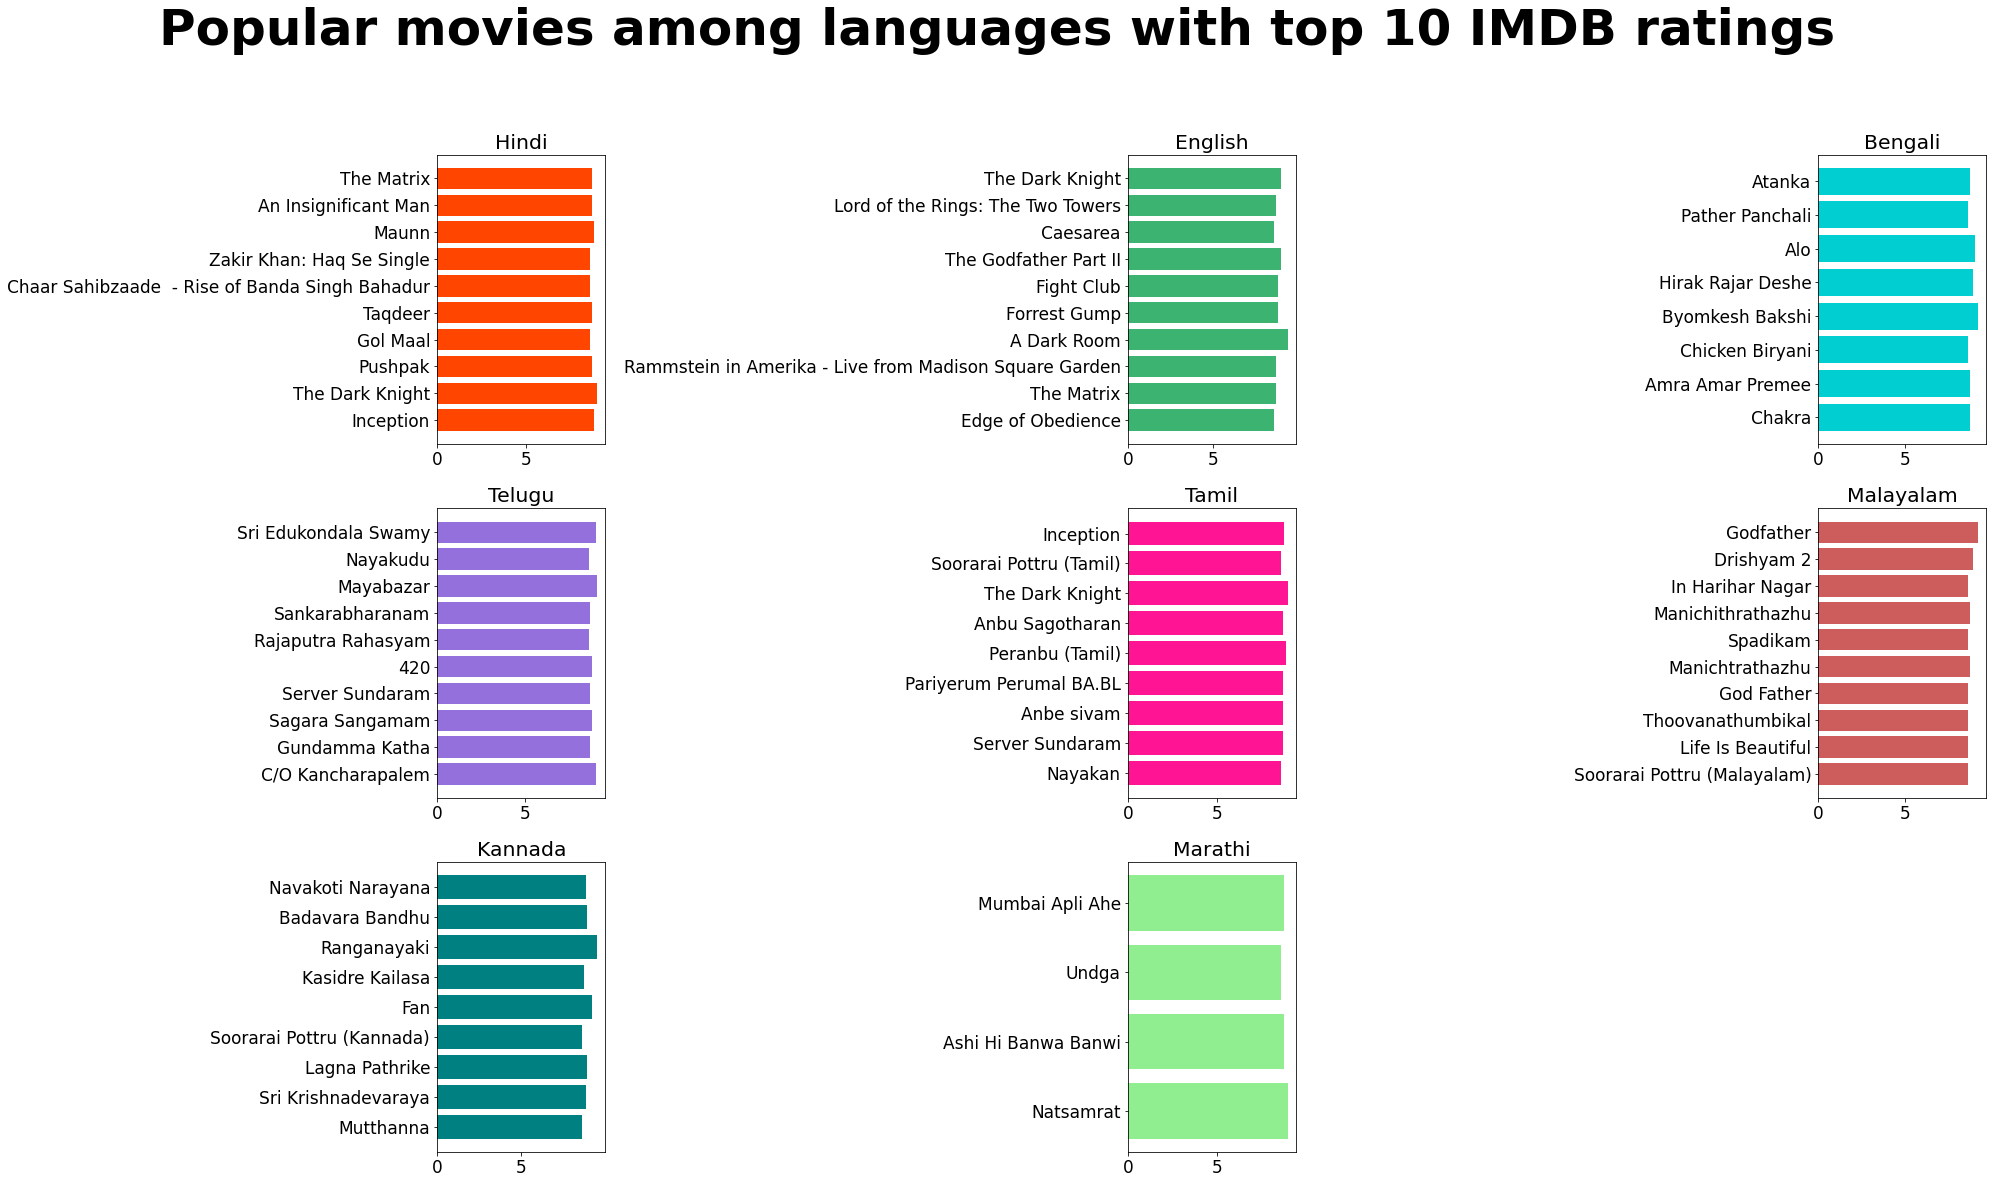

In [14]:
from matplotlib.pyplot import figure
import math

colours = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred", "teal", "lightgreen"]
languages_list = ['Hindi','English','Bengali','Telugu', 'Tamil','Malayalam','Kannada','Marathi'] 

col = "imdb_rating"

figure(num=None, figsize=(28, 15))
for i, lang in zip(range(1,9), languages_list):
    
    lang_df = amz_prime[amz_prime['language']==lang]
    movies = lang_df[lang_df['imdb_rating'] > 8.5] 
    movies = movies.head(10)    
    
    plt.rcParams.update({'font.size' : 17})
   
    plt.subplot(3,3,i)
    
    plt.barh(movies['movie_name'], movies['imdb_rating'], color = colours[i-1]) 
    
    plt.title(lang)
    
plt.tight_layout()
plt.suptitle('Popular movies among languages with top 10 IMDB ratings', y=1.1, fontweight='bold', fontsize=50)
plt.show()
    

## 5. Some of the Oldest Movies:


In [15]:
for lang in languages_list:
    old = amz_prime[amz_prime['language'] == lang]
    print("\n" +lang)
    old = old.sort_values("year_of_release", ascending=True)
    old = old[old['year_of_release'] != 0].reset_index()
    print(old[['movie_name', 'year_of_release']].head())
    


Hindi
               movie_name  year_of_release
0                 Khilona             1970
1                 Bachpan             1970
2  Tum Haseen Main Jawaan             1970
3                   Anand             1970
4           Jeevan Mrityu             1970

English
                                movie_name  year_of_release
0                                   Vampir             1971
1                            The Godfather             1972
2  Reminiscences of a Journey to Lithuania             1972
3               Three Cheers for the Whale             1972
4   The Autobiography of Miss Jane Pittman             1974

Bengali
                     movie_name  year_of_release
0             Diba Ratrir Kabya             1970
1                 Manjari Opera             1970
2            Eai Korechho Bhalo             1970
3  Bhanu Goenda Jahar Assistant             1971
4                       Ekhonee             1971

Telugu
                  movie_name  year_of_release
0        

So Amazon Prime has movies released more than half a century back. 

## 6. Word Cloud

Before ending the project, lets now explore the wordclouds:
I'll first generate the word cloud for the plot column and for the movie_name column

### WordCloud for plot:

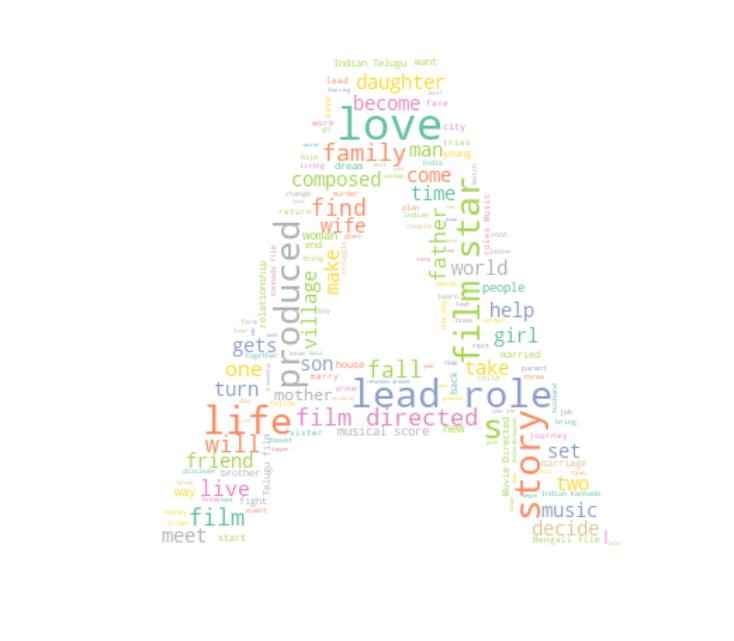

In [16]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib
import numpy as np

#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['#221f1f', '#b20710'])
text = str(list(amz_prime['plot'])) #.replace(',','').replace(',', '').replace(',', '').replace(',', '').replace(',', '')
mask = np.array(Image.open('letterA.png'))
wordcloud = WordCloud(background_color = 'white', width=500, height=200, colormap='Set2', max_words=150, mask=mask).generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
    

Love, life, lead, role, story and produced are some of the most frequent words appearing in the description of movies.

### Word Cloud for movie_name:

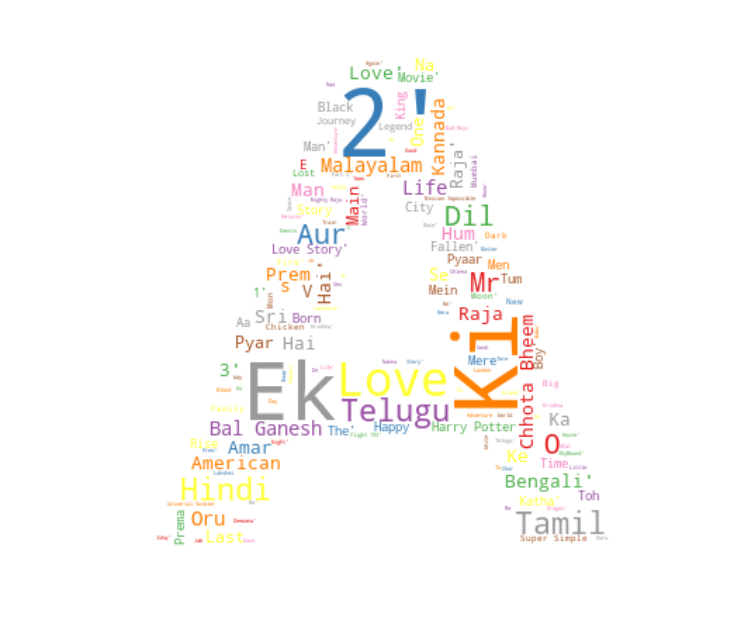

In [18]:
text = str(list(amz_prime['movie_name'])).replace(',','').replace(',', '').replace(',', '').replace(',', '').replace(',', '')
mask = np.array(Image.open('letterA.png'))
wordcloud = WordCloud(background_color = 'white', width=500, height=200, colormap='Set1', max_words=150, mask=mask).generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see huge number 2 on top of the wordcloud, looks like prime has lot many movie sequels.Also Ek and Ki of hindi words seems to be popularly used in most of the movie names.Love remains the most commonly uses word among movie names too!